In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.model_selection import cross_val_score


In [2]:
titanic_data = pd.read_csv("titanic_data.csv")

In [59]:
cluster_features = ["Pclass", "Survived", "Age", "Sex", "Fare"]
titanic_cluster_data = titanic_data[cluster_features].dropna()
# change sex data from text to numeric
titanic_cluster_data["Sex"] = titanic_cluster_data["Sex"].map({"male": 0, "female": 1})

In [60]:
kmeans = KMeans(n_clusters=4, random_state=42)
titanic_cluster_data["Cluster"] = kmeans.fit_predict(titanic_cluster_data.drop("Survived", axis = 1))

/Users/pandysudhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


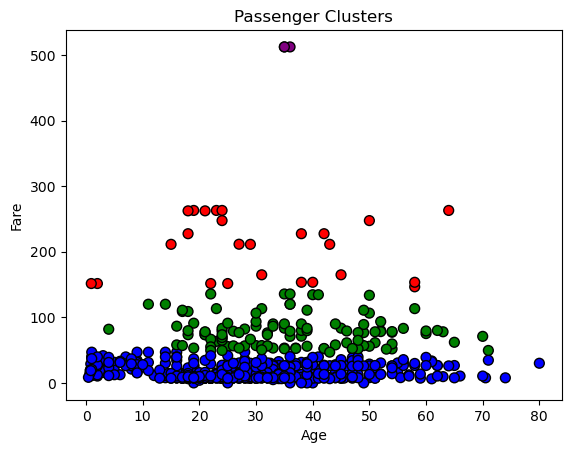

Survival and Death Counts in Each Cluster:


,Cluster,Survived,Total,Color
0,0,18,25,red
1,1,190,572,blue
2,2,79,114,green
3,3,3,3,purple


In [65]:
# Visualizing the clusters
cluster_colors = ['red', 'blue', 'green', 'purple']

plt.scatter(
    titanic_cluster_data["Age"],
    titanic_cluster_data["Fare"],
    c=titanic_cluster_data["Cluster"].map({0: cluster_colors[0], 1: cluster_colors[1], 2: cluster_colors[2], 3: cluster_colors[3]}),
    edgecolors="k",
    s=50
)
plt.title("Passenger Clusters")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


cluster_survival_counts = titanic_cluster_data.groupby(['Cluster', 'Survived']).size().unstack(fill_value=0)
cluster_survival_counts.columns = ['Died', 'Survived']
cluster_survival_counts.reset_index(inplace=True)
cluster_survival_counts['Total'] = cluster_survival_counts['Died'] + cluster_survival_counts['Survived']


cluster_survival_counts['Color'] = cluster_survival_counts['Cluster'].map({0: cluster_colors[0], 1: cluster_colors[1], 2: cluster_colors[2], 3: cluster_colors[3]})

print("Survival and Death Counts in Each Cluster:")
display(cluster_survival_counts[['Cluster', 'Survived', 'Total', 'Color']])



In [22]:
classification_features = ["Pclass", "Survived", "Age", "Fare", "Sex", "SibSp", "Parch"]
titanic_classification_data = titanic_data[classification_features].dropna()

# change sex data from text to numeric
titanic_classification_data["Sex"] = titanic_classification_data["Sex"].map({"male": 0, "female": 1})

In [23]:
titanic_classification_data

,Pclass,Survived,Age,Fare,Sex,SibSp,Parch
0,3,0,22.0,7.2500,0,1,0
1,1,1,38.0,71.2833,1,1,0
2,3,1,26.0,7.9250,1,0,0
3,1,1,35.0,53.1000,1,1,0
4,3,0,35.0,8.0500,0,0,0
...,...,...,...,...,...,...,...
885,3,0,39.0,29.1250,1,0,5
886,2,0,27.0,13.0000,0,0,0
887,1,1,19.0,30.0000,1,0,0
889,1,1,26.0,30.0000,0,0,0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    titanic_classification_data.drop("Survived", axis=1),
    titanic_classification_data["Survived"],
    test_size=0.2,
    random_state=42
)

In [67]:
classification_model = LogisticRegression(random_state=42)
classification_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [70]:
joblib.dump(classification_model, 'classification_model.joblib')  

['classification_model.joblib']

In [72]:
predictions = classification_model.predict(X_test)


In [76]:
#cross-validation
cross_val_scores = cross_val_score(classification_model, X_train, y_train, cv=5, scoring='accuracy')


print("Cross-Validation Scores:", cross_val_scores)
print("Mean Accuracy:", cross_val_scores.mean())

Cross-Validation Scores: [0.7826087  0.78070175 0.83333333 0.86842105 0.8245614 ]
Mean Accuracy: 0.8179252479023648


In [27]:
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)

In [36]:
conf_matrix = confusion_matrix(y_test, predictions)
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Calculate specificity (True Negative Rate)
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])


conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

print("Confusion Matrix:")
display(conf_matrix_df)

print("\nAccuracy:", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall (Sensitivity):", round(recall, 2))
print("Specificity:", round(specificity, 2))
print("F1 Score:", round(f1, 2))

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,71,16
Actual 1,20,36



Accuracy: 0.75
Precision: 0.69
Recall (Sensitivity): 0.64
Specificity: 0.82
F1 Score: 0.67
